In [11]:
from IPython.display import display, HTML
HTML(
    """
    <script
        src='https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.js'>
    </script>
    <script>
        code_show=true;
        function code_toggle() {
        if (code_show){
        $('div.jp-CodeCell > div.jp-Cell-inputWrapper').hide();
        } else {
        $('div.jp-CodeCell > div.jp-Cell-inputWrapper').show();
        }
        code_show = !code_show
        }
        $( document ).ready(code_toggle);
    </script>
    <form action='javascript:code_toggle()'>
        <input type="submit" value='Click here to toggle on/off the raw code.'>
    </form>
    """
)

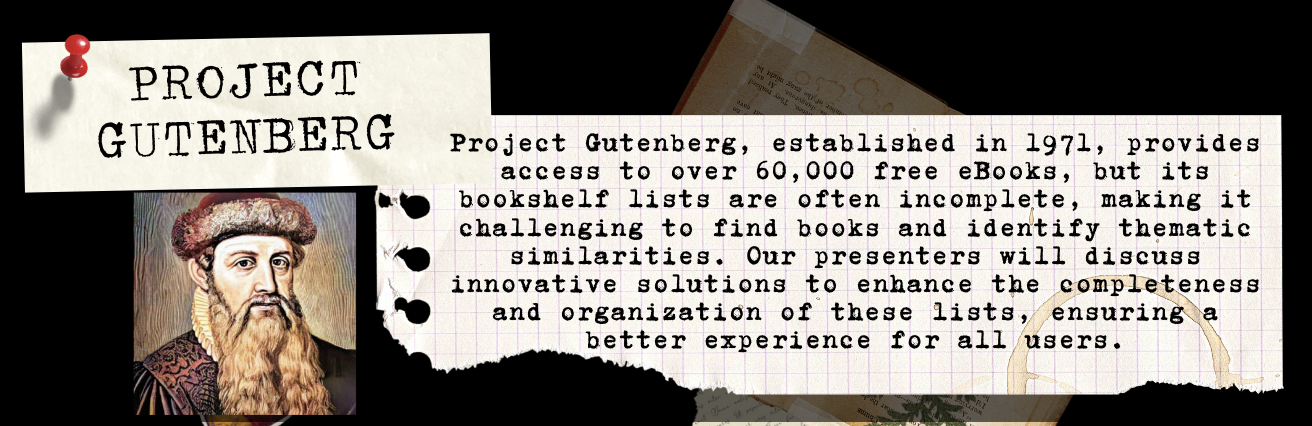

In [1]:
from IPython.display import Image, display
import os

# Path to the image file in the home directory
home_dir = os.path.expanduser('~')
image_path = os.path.join(home_dir, 'BDCC .png')

# Displaying the image
img = Image(filename=image_path)
display(img)


<a id='Header2'></a>
<h1 style="color:#151515; background-color:#6DC5D1; padding: 20px 0; text-align: left; font-weight: bold; padding-left: 20px;">I. ABSTRACT</h1><a id='ExecSum'></a><a id='Title'></a><a

Project Gutenberg provides access to over 60,000 free eBooks, but its bookshelf lists are often incomplete and disorganized, making it challenging to find books and identify thematic similarities. This paper presents an automated approach to complete and enhance Project Gutenberg’s bookshelf lists using natural language processing (NLP) and machine learning. Through generating synthetic negative samples, we train a model to learn the characteristics of each bookshelf, to find other books that may belong to it.


<a id='Header2'></a>
<h1 style="color:#151515; background-color:#6DC5D1; padding: 20px 0; text-align: left; font-weight: bold; padding-left: 20px;">II. INTRODUCTION</h1><a id='ExecSum'></a><a id='Title'></a><a

Project Gutenberg, established in 1971, is a vast repository of free eBooks (Project Gutenberg, n.d.). Despite its extensive collection, the user-generated bookshelves on Project Gutenberg often suffer from incomplete and inconsistent organization. This paper addresses these issues by proposing automated solutions to categorize and enhance the bookshelf lists, thereby improving the ease of finding and accessing books.


<a id='Header2'></a>
<h1 style="color:#151515; background-color:#6DC5D1; padding: 20px 0; text-align: left; font-weight: bold; padding-left: 20px;">III. PROJECT OBJECTIVES AND PURPOSE</h1><a id='ExecSum'></a><a id='Title'></a><a

The primary objective of this project is to enhance the completeness and organization of Project Gutenberg's bookshelf lists. By implementing advanced data processing techniques, we aim to:
- Improve the searchability of books.
- Identify and group books with similar themes.
- Eliminate duplicate entries in the bookshelves.
- Provide a better overall user experience.


<h2 style="color: black;">A. Problem Statement</h2>

How might we complete Project Gutenberg’s user-generated bookshelves using natural language and big data processing techniques?


<h2 style="color: Black;">B. Motivation</h2>

The motivation behind this project stems from the need to make vast digital libraries like Project Gutenberg more accessible and user-friendly. Enhancing the organization and completeness of bookshelves will significantly improve the user experience, facilitating easier discovery and access to relevant books.

<a id='Header2'></a>
<h1 style="color:#151515; background-color:#6DC5D1; padding: 20px 0; text-align: left; font-weight: bold; padding-left: 20px;">IV. EDA</h1><a id='ExecSum'></a><a id='Title'></a><a


| Feature Name | Feature Description                                                                 | Data Type |
|--------------|-------------------------------------------------------------------------------------|-----------|
| Title        | Name of the book                                                                    | String    |
| Subjects     | Categories or topics covered by the book or document, potentially containing multiple values | String    |
| LoCC         | Library of Congress Classification code, used to categorize books and documents within the library system | String    |
| Bookshelves  | The assigned bookshelf or category for the book or document within Project Gutenberg, potentially containing multiple values | String    |
| Text #       | Unique identifier for the text                                                      | Integer   |
| Type         | Type of the publication (e.g., book, dataset)                                        | String    |
| Authors      | Authors of the book                                                                 | String    |
| Issued       | The year the book was issued                                                        | String    |
| Language     | Language in which the book is written (e.g., English, Spanish)                      | String    |
| Body Text    | The main content of the book or document, used to train the model                    | String    |


The contents of `pg_catalog.csv` and `body text`.

In [5]:
import pandas as pd

catalog_df = pd.read_csv('pg_catalog.csv')

english_cat_df = catalog_df[catalog_df['Language'] == 'en']
english_cat_df[:5]

/tmp/ipykernel_98014/4094278601.py:3: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  catalog_df = pd.read_csv('pg_catalog.csv')


,Text#,Type,Issued,Title,Language,Authors,Subjects,LoCC,Bookshelves
0,1,Text,1971-12-01,The Declaration of Independence of the United ...,en,"Jefferson, Thomas, 1743-1826","United States -- History -- Revolution, 1775-1...",E201; JK,Politics; American Revolutionary War; United S...
1,2,Text,1972-12-01,The United States Bill of Rights\r\nThe Ten Or...,en,United States,Civil rights -- United States -- Sources; Unit...,JK; KF,Politics; American Revolutionary War; United S...
2,3,Text,1973-11-01,John F. Kennedy's Inaugural Address,en,"Kennedy, John F. (John Fitzgerald), 1917-1963",United States -- Foreign relations -- 1961-196...,E838,NaN
3,4,Text,1973-11-01,Lincoln's Gettysburg Address\r\nGiven November...,en,"Lincoln, Abraham, 1809-1865",Consecration of cemeteries -- Pennsylvania -- ...,E456,US Civil War
4,5,Text,1975-12-01,The United States Constitution,en,United States,United States -- Politics and government -- 17...,JK; KF,United States; Politics; American Revolutionar...


In [6]:

title_bookshelves_data = []

# Iterate over each row in the DataFrame
for index, row in english_cat_df.iterrows():
    # Check if 'Bookshelves' is not NaN
    if not pd.isna(row['Bookshelves']):
        # Split the bookshelves by ";"
        bookshelves = row['Bookshelves'].split(';')
        for bookshelf in bookshelves:
            # Add a new row to the list for each title and bookshelf combination
            title_bookshelves_data.append({'Title': row['Title'], 'Bookshelf': bookshelf.strip()})

# Create a new DataFrame from the list of title-bookshelf data
title_bookshelves_df = pd.DataFrame(title_bookshelves_data)


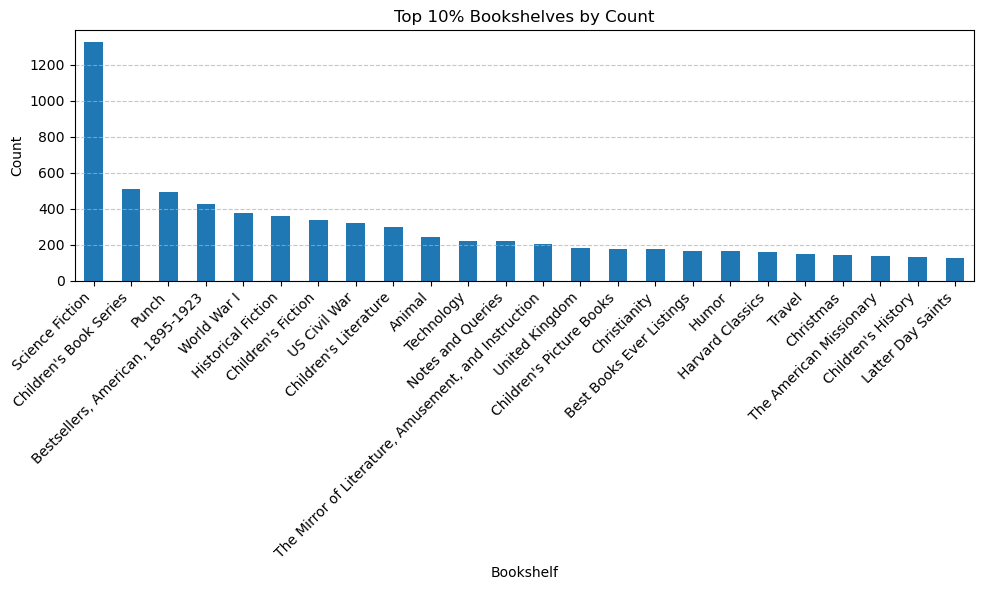

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have title_bookshelves_df DataFrame

# Count occurrences of each bookshelf
bookshelf_counts = title_bookshelves_df['Bookshelf'].value_counts()

# Calculate the top 10% threshold count
threshold_count = int(len(bookshelf_counts) * 0.1)

# Select only the top 10% bookshelves
top_bookshelves = bookshelf_counts.head(threshold_count)

# Plot histogram for the top 10% bookshelves
plt.figure(figsize=(10, 6))
top_bookshelves.plot(kind='bar')
plt.title('Top 10% Bookshelves by Count')
plt.xlabel('Bookshelf')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate labels and align to the right
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Top 10% of Bookshelves by Count have about 70-500 books.

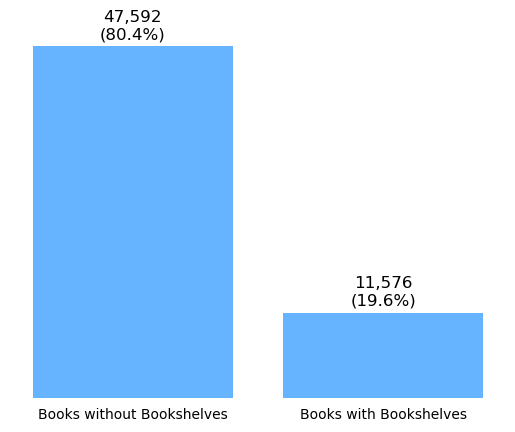

In [8]:
import matplotlib.pyplot as plt

# Count the number of books without bookshelves
books_without_bookshelves = english_cat_df['Bookshelves'].isnull().sum()

# Total number of books
total_books = len(english_cat_df)

# Calculate the number of books with bookshelves
books_with_bookshelves = total_books - books_without_bookshelves

# Data for plotting
categories = ['Books without Bookshelves', 'Books with Bookshelves']
counts = [books_without_bookshelves, books_with_bookshelves]
percentages = [count / total_books * 100 for count in counts]

# Plot the data
fig, ax = plt.subplots()
bars = ax.bar(categories, counts, color='#66b3ff')

# Add numbers and percentages above the bars
for bar, count, percentage in zip(bars, counts, percentages):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.01 * total_books,
            f'{count:,}\n({percentage:.1f}%)', ha='center', va='bottom', fontsize=12)

# Customize the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.yaxis.set_visible(False)
ax.xaxis.set_ticks_position('none')

plt.show()


The vast majority of books are not in any bookshelves, confirming our Methodology.

<a id='Header2'></a>
<h1 style="color:#151515; background-color:#6DC5D1; padding: 20px 0; text-align: left; font-weight: bold; padding-left: 20px;">V. METHODOLOGY</h1><a id='ExecSum'></a><a id='Title'></a><a


The core of this methodology is the use of **negative samples** to train a binary classifier for each bookshelf. That is because each bookshelf overlaps with each other--and therefore, it would not make sense to simply train a multiclassifer that would sort each book into discrete bookshelves. Rather, synthetic negative sampling helps the model learn the patters of the positive class, and figure out what else would belong to it.

The methodology is broken down into finer parts per code cell below. This documentation was prepared with assistance from ChatGPT.


In [10]:
aws_access_key_id = ###
aws_secret_access_key = ###
region_name = ####

from pyspark.sql import SparkSession

spark = SparkSession.builder\
    .getOrCreate()

spark._jsc.hadoopConfiguration().set("fs.s3a.access.key", aws_access_key_id)
spark._jsc.hadoopConfiguration().set("fs.s3a.secret.key", aws_secret_access_key)
spark._jsc.hadoopConfiguration().set("fs.s3a.endpoint",
                                     f"s3.{region_name}.amazonaws.com")
spark._jsc.hadoopConfiguration().set("fs.s3a.impl",
                                     "org.apache.hadoop.fs.s3a.S3AFileSystem")
spark._jsc.hadoopConfiguration().set("com.amazonaws.services.s3a.enableV4",
                                     "true")
spark._jsc.hadoopConfiguration().set(
    "fs.s3a.aws.credentials.provider",
    "org.apache.hadoop.fs.s3a.SimpleAWSCredentialsProvider")
spark.conf.set("spark.driver.maxResultSize", "4g")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

An error was encountered:
[CANNOT_MODIFY_CONFIG] Cannot modify the value of the Spark config: "spark.driver.maxResultSize".
See also 'https://spark.apache.org/docs/latest/sql-migration-guide.html#ddl-statements'.
Traceback (most recent call last):
  File "/mnt/yarn/usercache/livy/appcache/application_1718409142952_0028/container_1718409142952_0028_01_000001/pyspark.zip/pyspark/sql/conf.py", line 43, in set
    self._jconf.set(key, value)
  File "/mnt/yarn/usercache/livy/appcache/application_1718409142952_0028/container_1718409142952_0028_01_000001/py4j-0.10.9.7-src.zip/py4j/java_gateway.py", line 1322, in __call__
    return_value = get_return_value(
  File "/mnt/yarn/usercache/livy/appcache/application_1718409142952_0028/container_1718409142952_0028_01_000001/pyspark.zip/pyspark/errors/exceptions/captured.py", line 185, in deco
    raise converted from None
pyspark.errors.exceptions.captured.AnalysisException: [CANNOT_MODIFY_CONFIG] Cannot modify the value of the Spark config: "spark.

In [2]:
sc

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<SparkContext master=yarn appName=livy-session-29>

In [3]:
sc.install_pypi_package("boto3")
sc.install_pypi_package("zipfile")
sc.install_pypi_package("io")
sc.install_pypi_package("nltk")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…






ERROR: Could not find a version that satisfies the requirement zipfile (from versions: none)
ERROR: No matching distribution found for zipfile

ERROR: Could not find a version that satisfies the requirement io (from versions: none)
ERROR: No matching distribution found for io


In [4]:
sc.install_pypi_package("fuzzywuzzy")
sc.install_pypi_package("python-Levenshtein")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [5]:
sc.install_pypi_package("pandas")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Attempting uninstall: python-dateutil
    Found existing installation: python-dateutil 2.8.1
    Not uninstalling python-dateutil at /usr/lib/python3.9/site-packages, outside environment /mnt/yarn/usercache/livy/appcache/application_1718409142952_0028/container_1718409142952_0028_01_000001/tmp/spark-a9f64fea-fd09-4b0b-b595-3cdbc655fe94
    Can't uninstall 'python-dateutil'. No files were found to uninstall.

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
awscli 2.15.30 requires python-dateutil<=2.8.2,>=2.1, but you have python-dateutil 2.9.0.post0 which is incompatible.

### Extracting, Preprocessing, and Storing Text Data from ZIP Files in S3

This cell accomplishes several critical tasks for processing Project Gutenberg books stored as ZIP files in an S3 bucket:

1. **List Files in S3 Bucket**: Defines a function to list files in the specified S3 bucket and prefix.
2. **Extract Text from ZIP Files**: Defines a function to extract text from ZIP files stored in S3, attempting multiple encodings to handle diverse text formats.
3. **Preprocess Extracted Text**: Defines a function to preprocess the text, extracting metadata such as title and author, and removing Project Gutenberg headers.
4. **Add Salt to Keys**: Ensures even distribution of keys for parallel processing by adding random salt.
5. **RDD Creation and Transformation**:
   - Lists all ZIP files in the specified S3 directory.
   - Creates an RDD from the list of S3 file paths.
   - Filters for ZIP files and applies salt to keys for repartitioning.
   - Extracts and preprocesses text data.
6. **Convert to DataFrame**: Converts the processed RDD to a DataFrame, removes duplicates, and saves it as Parquet files in another S3 bucket.
7. **Output and Verification**: Reads the saved Parquet files back into a DataFrame, displays the first few records, and prints the final record count.

This comprehensive pipeline ensures that the text data from Project Gutenberg ZIP files is efficiently extracted, cleaned, and stored for further analysis or machine learning tasks.

In [8]:
import re
import string
import random
import boto3
import zipfile
import io
from pyspark.sql import SparkSession

# AWS credentials and region
aws_access_key_id = ###
aws_secret_access_key = ###
region_name = ###


def list_s3_files(bucket, prefix):
    """
    List files in an S3 bucket with a specific prefix.

    Args
    ----
    - bucket (str): Name of the S3 bucket.
    - prefix (str): Prefix to filter the files.

    Returns
    -------
    - list: List of S3 file paths matching the prefix.
    """
    s3 = boto3.client('s3',
                      aws_access_key_id=aws_access_key_id,
                      aws_secret_access_key=aws_secret_access_key,
                      region_name=region_name)
    paginator = s3.get_paginator('list_objects_v2')
    operation_parameters = {'Bucket': bucket, 'Prefix': prefix}
    file_paths = []
    for page in paginator.paginate(**operation_parameters):
        for content in page.get('Contents', []):
            file_paths.append(f"s3://{bucket}/{content['Key']}")
    return file_paths


def extract_text_from_zip(file_path):
    """
    Extract text content from a ZIP file stored in S3.

    Args
    ----
    - file_path (str): S3 path to the ZIP file.

    Returns
    -------
    - list: List of extracted text contents from .txt files within the ZIP.
    """
    s3 = boto3.client('s3',
                      aws_access_key_id=aws_access_key_id,
                      aws_secret_access_key=aws_secret_access_key,
                      region_name=region_name)

    bucket_name = file_path.split('/')[2]
    key = '/'.join(file_path.split('/')[3:])

    zip_obj = s3.get_object(Bucket=bucket_name, Key=key)
    buffer = io.BytesIO(zip_obj['Body'].read())
    extracted_texts = []

    try:
        with zipfile.ZipFile(buffer, 'r') as z:
            file_names = [
                file_name for file_name in z.namelist()
                if file_name.endswith('.txt')
            ]
            if not file_names:
                return []  # Return empty list if no .txt files are found

            for file_name in file_names:
                with z.open(file_name) as f:
                    encodings = [
                        'utf-8', 'iso-8859-1', 'ascii', 'iso-646-us', 'latin1',
                        'windows-1252', 'utf-16', 'utf-16le', 'utf-16be',
                        'utf-32', 'utf-32le', 'utf-32be', 'cp437', 'cp850',
                        'macroman'
                    ]
                    for encoding in encodings:
                        try:
                            extracted_texts.append(f.read().decode(encoding))
                            break
                        except (UnicodeDecodeError, LookupError):
                            continue  # Try the next encoding
                    else:
                        raise UnicodeDecodeError(
                            f"Cannot decode file {file_name} in {file_path} with any of the specified encodings."
                        )
    except zipfile.BadZipFile:
        raise zipfile.BadZipFile(
            f"BadZipFile: {file_path} is not a valid zip file.")

    return extracted_texts


def preprocess_text(text):
    """
    Preprocess extracted text to extract title, author, and body.

    Args
    ----
    - text (str): Raw text content of the book.

    Returns
    -------
    - tuple: Extracted title, author, and processed body of the book.
    """
    header_end1 = re.search(
        r"\*END\*THE SMALL PRINT! FOR PUBLIC DOMAIN ETEXTS\*Ver\.\d+\.\d+\.\d+\*END\*",
        text)
    header_end2 = re.search(
        r"\*\*\* ?START OF (THIS|THE) PROJECT GUTENBERG EBOOK.*\*\*\*", text,
        re.IGNORECASE)

    if header_end1:
        header = text[:header_end1.start()]
        body_start = header_end1.end()
    elif header_end2:
        header = text[:header_end2.start()]
        body_start = header_end2.end()
    else:
        return "Unknown Title", "Unknown Author", text.strip(
        )  # Return the entire text if markers are not found

    body = text[body_start:]

    title_match = re.search(r"Title:\s*(.*)", header, re.IGNORECASE)
    author_match = re.search(r"Author:\s*(.*)", header, re.IGNORECASE)

    title = title_match.group(1).strip() if title_match else "Unknown Title"
    author = author_match.group(1).strip() if author_match else "Unknown Author"

    return title, author, body.strip()


def add_salt_to_key(key):
    """
    Add salt (random characters) to a given key.

    Args
    ----
    - key (str): Original key.

    Returns
    -------
    - str: Key with added salt.
    """
    salt = ''.join(random.choices(string.ascii_letters + string.digits, k=5))
    return f"{salt}_{key}"


# Define S3 bucket and prefix
s3_bucket = 'bdcc2024-studio-aymson2'
s3_prefix = 'zips/'

# List all ZIP files in the specified S3 directory
s3_file_paths = list_s3_files(s3_bucket, s3_prefix)

# Create an RDD from the list of S3 file paths
num_partitions = 560  # Adjust based on your calculation
rdd = spark.sparkContext.parallelize(s3_file_paths).repartition(num_partitions)

zip_rdd = rdd.filter(lambda x: x.endswith('.zip'))

# Create an RDD with salted keys
salted_rdd = zip_rdd.map(lambda x: (add_salt_to_key(x), x))

# Repartition RDD using salted keys
repartitioned_rdd = salted_rdd.partitionBy(num_partitions).map(lambda x: x[1])

# Apply extraction function
extracted_text_rdd = repartitioned_rdd.flatMap(
    lambda x: extract_text_from_zip(x))

# Apply preprocessing function with flexible marker detection
processed_text_rdd = extracted_text_rdd.map(lambda x: preprocess_text(
    x)).filter(lambda x: x[2] is not None and x[2].strip() != "")

# Convert RDD to DataFrame
df = processed_text_rdd.toDF(["title", "author", "body"])
df = df.dropDuplicates(["title"])

own_s3_bucket = 'bdcc--miguelsingian-ass2-2024'
parquet_output_path = f"s3a://{own_s3_bucket}/dataset_parquet/"

# Save DataFrame with "overwrite" mode
df.write.mode("overwrite").parquet(parquet_output_path)
print(f"DataFrame successfully saved as Parquet files to {parquet_output_path}")

df = spark.read.parquet(parquet_output_path)
df.show(5)

# Print count of records in DataFrame
final_record_count = df.count()
print(f"Number of records in the final DataFrame: {final_record_count}")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

DataFrame successfully saved as Parquet files to s3a://bdcc--miguelsingian-ass2-2024/dataset_parquet/
+--------------------+--------------------+--------------------+
|               title|              author|                body|
+--------------------+--------------------+--------------------+
|A Discourse on th...|      John F. Mesick|Produced by Gerar...|
|      A Woman's Will|         Anne Warner|Produced by Suzan...|
|       A World Apart|Samuel Kimball Me...|Produced by Greg ...|
|Book of Hymns for...|             Various|Produced by Ryan ...|
| Chromosome Number 2|Human Genome Project|>chr2\r\nCGTATccc...|
+--------------------+--------------------+--------------------+
only showing top 5 rows

Number of records in the final DataFrame: 35720

### Loading Processed Data from S3 Parquet Files

This cell reads the previously saved Parquet files from the specified S3 bucket and path into a Spark DataFrame. This allows for efficient loading and access to the preprocessed Project Gutenberg text data for subsequent analysis or machine learning tasks.

In [6]:
own_s3_bucket = 'bdcc--miguelsingian-ass2-2024'
parquet_output_path = f"s3a://{own_s3_bucket}/dataset_parquet/"
df = spark.read.parquet(parquet_output_path)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### Reading and Converting CSV Data from S3 to Spark DataFrame

This cell reads a CSV file (`pg_catalog.csv`) from the S3 bucket (`bdcc2024-studio-aymson2`) using `boto3`, converts it into a Pandas DataFrame, and subsequently converts that into a Spark DataFrame (`catalog_df`). 

In [7]:
import boto3
import pandas as pd
from io import BytesIO

# AWS credentials
aws_access_key_id = ###
aws_secret_access_key = ###
region_name = ###

# S3 bucket and file details
bucket_name = 'bdcc2024-studio-aymson2'
file_key = 'pg_catalog.csv'

s3 = boto3.client('s3',
                  aws_access_key_id=aws_access_key_id,
                  aws_secret_access_key=aws_secret_access_key,
                  region_name=region_name)

# Read the CSV file from S3
obj = s3.get_object(Bucket=bucket_name, Key=file_key)
data = obj['Body'].read()

# Create a BytesIO object to simulate a file-like object
csv_data = BytesIO(data)

# Read CSV data into a pandas DataFrame
pdf = pd.read_csv(csv_data)

# Convert the pandas DataFrame to a Spark DataFrame
catalog_df = spark.createDataFrame(pdf)

catalog_df
# selected_df = catalog_df.select("Title", "Authors", "Bookshelves")
# selected_df.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

DataFrame[Text#: bigint, Type: string, Issued: string, Title: string, Language: string, Authors: string, Subjects: string, LoCC: string, Bookshelves: string]
<stdin>:27: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.

### Deduplicating and Matching Titles with Levenshtein Distance

This cell performs the following operations:

1. **User-Defined Function (UDF) Registration**: Defines a UDF (`levenshtein_distance_udf`) to calculate normalized Levenshtein distance between two strings.
   
2. **Data Preparation**:
   - Selects the "title" column from `df` (assumed to be the DataFrame containing processed text data).
   
3. **Matching Titles**:
   - Cross-joins `temp_title_df` with `catalog_df` (DataFrame containing catalog data) to generate pairs of titles.
   - Computes Levenshtein distance between each pair of titles and adds it as a new column ("distance") in `df_pairs`.
   
4. **Ranking and Deduplication**:
   - Defines a window specification to partition by "title" and orders by "distance".
   - Computes row numbers based on the sorted distance within each partition (`ranked_df`).
   - Filters `ranked_df` to retain rows with `rank = 1` (least distance), resulting in `deduplicated_df`.
   
5. **Joining and Schema**:
   - Joins `deduplicated_df` with `df` on "title" to incorporate the corresponding "body".
   - Drops duplicate entries based on "title" to ensure uniqueness.
   - Prints the schema of `deduplicated_df_with_body` to summarize its structure.

This process efficiently identifies and retains unique titles from `df` by matching them with the closest titles in `catalog_df` based on Levenshtein distance, enhancing data quality for downstream analysis.

In [8]:
from pyspark.sql.functions import col, udf, when
from pyspark.sql.types import DoubleType
from pyspark.sql.window import Window
from pyspark.sql.functions import row_number
import Levenshtein


def normalized_levenshtein_distance(s1, s2):
    """
    Calculate the normalized Levenshtein distance between two strings.

    Args
    ----
    - s1 (str): First string.
    - s2 (str): Second string.

    Returns
    -------
    - float: Normalized Levenshtein distance between s1 and s2.
    """
    if s1 == s2:
        return 0.0
    if s1 in s2 or s2 in s1:
        return 0.1

    s1_words = s1.split()
    s2_words = s2.split()
    lev_dist = Levenshtein.distance(s1, s2)
    max_len = max(len(s1_words), len(s2_words))

    if max_len == 0:
        return 0.0
    return lev_dist / max_len


# Register UDF
levenshtein_distance_udf = udf(normalized_levenshtein_distance, DoubleType())
spark.udf.register("levenshtein_distance_udf", levenshtein_distance_udf)

temp_title_df = df.select("title")

# Calculate Levenshtein distance and filter based on threshold
df_pairs = temp_title_df.crossJoin(
    catalog_df.withColumnRenamed("Title", "catalog_title"))
df_pairs = df_pairs.withColumn(
    "distance", levenshtein_distance_udf(col("title"), col("catalog_title")))

# df_pairs.show(1)

# Define a window specification to partition by all columns and order by distance
windowSpec = Window.partitionBy("title").orderBy(
    col("distance").asc_nulls_last())

# Assign row numbers based on the sorted distance within each partition
ranked_df = df_pairs.withColumn("rank", row_number().over(windowSpec))

# Filter to keep rows with rank = 1 (which corresponds to the least distance)
deduplicated_df = ranked_df.filter(col("rank") == 1).drop(
    "rank", 'Text#', 'Type', 'Issued', 'Language', 'Subjects', 'LoCC',
    'catalog_title')

deduplicated_df_with_body = deduplicated_df.join(df.select("title", "body"),
                                                 on="title",
                                                 how="inner").dropDuplicates(
                                                     ["title"])

deduplicated_df_with_body.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- title: string (nullable = true)
 |-- Authors: string (nullable = true)
 |-- Bookshelves: string (nullable = true)
 |-- distance: double (nullable = true)
 |-- body: string (nullable = true)

### Tokenizing, Hashing, and Exploding Data for Bookshelf Analysis

This cell demonstrates the following steps:

1. **Tokenization**:
   - Uses `Tokenizer` to split the "body" column into individual words, storing the result in "words_data".
   
2. **Hashing**:
   - Applies `HashingTF` to convert the tokenized words into hashed features, limiting the number of features to 5,000. The transformed data is stored in "hashed_data".
   
3. **Exploding Bookshelves**:
   - Splits the "Bookshelves" column by semicolon and explodes it into multiple rows using `explode` function. The resulting DataFrame is named "exploded_data", from which the original "body" column is dropped.
   
4. **Saving and Loading Data**:
   - Saves "exploded_data" as Parquet files partitioned by "Bookshelf" and "title" into an S3 bucket (`bdcc--miguelsingian-ass2-2024/exploded_parquet/`).
   - Reads back the saved Parquet files into a new DataFrame (`exploded_data`) and displays the first 5 rows.

This process facilitates efficient tokenization, hashing of text data, and expansion of bookshelf categories for detailed analysis and exploration within a PySpark environment.

In [12]:
from pyspark.ml.feature import HashingTF, Tokenizer
from pyspark.sql.functions import split, col, explode

# Step 1: Tokenize the text column
tokenizer = Tokenizer(inputCol="body", outputCol="words")
words_data = tokenizer.transform(deduplicated_df_with_body)

# Step 2: Hash the tokenized words
hashing_tf = HashingTF(inputCol="words",
                       outputCol="hashed_features",
                       numFeatures=5_000)
hashed_data = hashing_tf.transform(words_data)
exploded_data = hashed_data.withColumn(
    "Bookshelf", explode(split(col("Bookshelves"), ";\\s*"))).drop('body')

own_s3_bucket = 'bdcc--miguelsingian-ass2-2024'
parquet_output_path = f"s3a://{own_s3_bucket}/exploded_parquet/"

# Save DataFrame with "overwrite" mode
exploded_data.write.mode("overwrite").partitionBy(
    "Bookshelf", "title").parquet(parquet_output_path)
print(f"DataFrame successfully saved as Parquet files to {parquet_output_path}")

exploded_data = spark.read.parquet(parquet_output_path)
exploded_data.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

DataFrame successfully saved as Parquet files to s3a://bdcc--miguelsingian-ass2-2024/exploded_parquet/
+--------------------+--------------------+--------+--------------------+--------------------+--------------------+--------------------+
|             Authors|         Bookshelves|distance|               words|     hashed_features|           Bookshelf|               title|
+--------------------+--------------------+--------+--------------------+--------------------+--------------------+--------------------+
|Rinehart, Mary Ro...|Bestsellers, Amer...|     0.1|[this, ebook, was...|(5000,[4,7,8,10,1...|Bestsellers, Amer...|The Bible, King J...|
|Haeckel, Ernst, 1...|        Anthropology|     0.0|[produced, by, su...|(5000,[4,7,8,10,1...|        Anthropology|The Evolution of Man|
|Human Genome Project|                 NaN|     0.1|[>chr2, , cgtatcc...|(5000,[0,1,2,3,4,...|                 NaN| Chromosome Number 2|
|       United States|                 NaN|     0.0|[motion, picture,...|(5

### Loading Exploded Data from S3 Parquet Files

This cell reads the previously saved Parquet files from the specified S3 bucket (`bdcc--miguelsingian-ass2-2024/exploded_parquet/`) into a Spark DataFrame (`exploded_data`).

In [7]:
own_s3_bucket = 'bdcc--miguelsingian-ass2-2024'
parquet_output_path = f"s3a://{own_s3_bucket}/exploded_parquet/"

exploded_data = spark.read.parquet(parquet_output_path)
# exploded_data.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### Training and Evaluating a Machine Learning Model for Bookshelf Classification

The `train_and_evaluate_model` function is designed to train a logistic regression model for classifying book titles into specific bookshelf categories based on hashed text features. Here's a detailed breakdown of its functionality:

1. **Filtering and Labeling**:
   - **Filtering**: Extracts rows from the `exploded_data` DataFrame that belong to a specified `bookshelf` category.
   - **Labeling**: Adds a "class" column where positive examples are marked as 1, indicating membership in the target bookshelf.

2. **Train-Test Split and Synthetic Data Generation**:
   - **Train-Test Split**: Divides the filtered data into training (80%) and testing (20%) sets. This split ensures the model's performance can be effectively evaluated.
   - **Synthetic Data Generation**: Creates synthetic negative samples to balance the dataset. These samples are generated using distinct hashed features from the entire `exploded_data`.

3. **Model Training**:
   - **Logistic Regression**: Utilizes logistic regression as the machine learning algorithm due to speed and interpretability (the predicted probabilities). No hyperparameter tuning was done, for fear of overfitting since this is a semi-supervised task.
   - **Pipeline Construction**: Constructs a data processing pipeline that includes assembling features and fitting the model using combined data from positive and synthetic negative samples.

4. **Model Evaluation**:
   - **Performance Metrics**: Assesses the model's performance using two key metrics:
     - **ROC (Receiver Operating Characteristic)**: Measures the model's ability to distinguish between positive and negative classes.
     - **AUCPR (Area Under Precision-Recall Curve)**: Evaluates the precision and recall trade-offs for different probability thresholds.

5. **Prediction and Probability Extraction**:
   - **Probabilistic Prediction**: Generates predicted probabilities for all rows in `exploded_data` except those belonging to the specified `bookshelf`.
   - **Probability Extraction**: Utilizes a user-defined function (`extract_prob`) to extract the probability of belonging to the positive class from the model's prediction probabilities.

6. **Sorting and Returning Predictions**:
   - **Ranking and Selection**: Ranks predictions by the extracted probability of the positive class in descending order.
   - **Top Predictions**: Limits the output to the top 50 predictions, providing a focused list of titles most likely to belong to the target bookshelf.


In [63]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, lit, rand, udf
from pyspark.sql.types import DoubleType
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml import Pipeline

# Define a UDF to extract the probability of the positive class
extract_prob = udf(lambda prob: float(prob[1]), DoubleType())


def train_and_evaluate_model(bookshelf, exploded_data):
    """
    Train and evaluate a logistic regression model for binary classification on a specific bookshelf category.

    This function filters the input DataFrame by the specified bookshelf category, generates synthetic negative samples,
    trains a logistic regression model on a combined dataset of positive and synthetic negative samples, evaluates the
    model performance using ROC and AUCPR metrics on a held-out test set of positive samples, and finally predicts the
    probabilities of being in the positive class for all titles outside the specified bookshelf category.

    Args
    ----
    - bookshelf (str): The bookshelf category to filter the data.
    - exploded_data (DataFrame): The DataFrame containing hashed features and bookshelf labels.

    Returns
    -------
    - DataFrame: A DataFrame with titles and their corresponding probabilities of being in the positive class,
                 sorted in descending order of probabilities.
    """
    # Step 1: Filter data by bookshelf
    filtered_data = exploded_data.filter(col("Bookshelf") == bookshelf)

    # Step 2: Add a "class" column (all 1s for positive class)
    filtered_data = filtered_data.withColumn("class", lit(1))

    # Step 3: Split into 80-20% train-test split for positive samples
    train_data_pos, test_data_pos = filtered_data.randomSplit([0.8, 0.2],
                                                              seed=42)

    # Step 4: Generate synthetic negative samples
    num_negative_samples = 15_000
    distinct_features = exploded_data.select("hashed_features").distinct()

    # Generate synthetic negative samples with random variation
    synthetic_negative_samples = distinct_features.withColumn(
        "rand_val", rand(seed=42))
    synthetic_negative_samples = synthetic_negative_samples.withColumn(
        "class", lit(0)).limit(num_negative_samples)

    # Combine positive and synthetic negative samples
    combined_data = train_data_pos.select("hashed_features", "class").union(
        synthetic_negative_samples.select("hashed_features", "class"))

    # Step 5: Train a machine learning model (Logistic Regression as an example)
    assembler = VectorAssembler(inputCols=["hashed_features"],
                                outputCol="features")
    lr = LogisticRegression(featuresCol="features",
                            labelCol="class",
                            maxIter=10,
                            regParam=0.01)

    pipeline = Pipeline(stages=[assembler, lr])
    model = pipeline.fit(combined_data)

    # Step 6: Evaluate model on test set (positive samples)
    evaluator = BinaryClassificationEvaluator(labelCol="class")

    # Evaluate ROC (areaUnderROC)
    ROC = evaluator.evaluate(model.transform(test_data_pos),
                             {evaluator.metricName: "areaUnderROC"})

    # Evaluate AUCPR (areaUnderPR)
    AUPRC = evaluator.evaluate(model.transform(test_data_pos),
                               {evaluator.metricName: "areaUnderPR"})

    print(f"Positive Class Evaluation Metrics:")
    print(f"ROC: {ROC:.4f}")
    print(f"AUCPR: {AUPRC:.4f}")

    # Step 7: Predict probabilities for the remaining data in exploded_data
    # Exclude only the rows from the specific bookshelf but keep others
    books_in_shelf = filtered_data.select("hashed_features").distinct()
    predictions_all_except = exploded_data.join(books_in_shelf,
                                                on="hashed_features",
                                                how="left_anti")

    predictions_all_except = model.transform(predictions_all_except)

    # Use the UDF to extract the probability of the positive class
    predictions_all_except = predictions_all_except.withColumn(
        "probability_positive", extract_prob(col("probability")))

    # Ensure probability column is resolved before sorting
    predictions_sorted = predictions_all_except.select("title", "probability_positive") \
        .orderBy(col("probability_positive").desc()) \
        .limit(50)

    return predictions_sorted

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<a id='Header2'></a>
<h1 style="color:#151515; background-color:#6DC5D1; padding: 20px 0; text-align: left; font-weight: bold; padding-left: 20px;">VI. RESULTS AND DISCUSSION </h1><a id='ExecSum'></a><a id='Title'></a><a

We tested the model on selections from the top 10% most populated bookshelves on the website. The following tables are lists of books that are not in the specified bookshelf (e.g. `The Universe -- or Nothing` is not in the `Science Fiction` bookshelf), but are predicted to be there by the model. Highlights are the results are very good quality--the model clearly found many books that belong to these bookshelves but haven't been added to them yet. It especially performs better the more specific a category is (e.g. `fiction` is general, `psychology` is specific).

Test ROC and PR-AUC was also reported, to see how well the model is able to find other books that already exist in the bookshelves, but are hidden in a validation set. All, as expected, achieved 100%, meaning the bookshelves are cohesive enough to have clear discernable patterns.

## Science Fiction

The model was able to find some fiction, and some books with scientific and space themes.

In [64]:
train_and_evaluate_model('Science Fiction', exploded_data).show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Exception in thread cell_monitor-64:
Traceback (most recent call last):
  File "/mnt/notebook-env/lib/python3.9/threading.py", line 980, in _bootstrap_inner
    self.run()
  File "/mnt/notebook-env/lib/python3.9/threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "/mnt/notebook-env/lib/python3.9/site-packages/awseditorssparkmonitoringwidget/cellmonitor.py", line 178, in cell_monitor
    job_binned_stages[job_id][stage_id] = all_stages[stage_id]
KeyError: 3096


Positive Class Evaluation Metrics:
ROC: 1.0000
AUCPR: 1.0000
+-----------------------------------------------------------------------------------------------------------------------------------------------+--------------------+
|title                                                                                                                                          |probability_positive|
+-----------------------------------------------------------------------------------------------------------------------------------------------+--------------------+
|A Plain and Literal Translation of The Arabian Nights Entertainments, Now Entitled The Book Of The Thousand Nights and A Night Volume 8 (of 17)|0.9037772701566493  |
|Project Cyclops                                                                                                                                |0.8786506718805329  |
|Makers                                                                                                 

## Children's Book Series

Though I don't know if these are *series*, these are clearly children's books.

In [65]:
train_and_evaluate_model("Children's Book Series",
                         exploded_data).show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Exception in thread cell_monitor-65:
Traceback (most recent call last):
  File "/mnt/notebook-env/lib/python3.9/threading.py", line 980, in _bootstrap_inner
    self.run()
  File "/mnt/notebook-env/lib/python3.9/threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "/mnt/notebook-env/lib/python3.9/site-packages/awseditorssparkmonitoringwidget/cellmonitor.py", line 178, in cell_monitor
    job_binned_stages[job_id][stage_id] = all_stages[stage_id]
KeyError: 3195


Positive Class Evaluation Metrics:
ROC: 1.0000
AUCPR: 1.0000
+----------------------------------------------------------------------------------------+--------------------+
|title                                                                                   |probability_positive|
+----------------------------------------------------------------------------------------+--------------------+
|Checkmates for 4 Pieces                                                                 |0.9999999999999978  |
|The Golden Bough: A Study in Magic and Religion (Third Edition, Vol.                    |0.9958638530492405  |
|The Call of the Beaver Patrol                                                           |0.985506770042649   |
|The Burgess Animal Book for Children                                                    |0.9634472741465234  |
|Nights With Uncle Remus                                                                 |0.9565393792299114  |
|Twelve Months with the Eighth Massachusett

## World War I

A very good result here: clearly books about war.

In [66]:
train_and_evaluate_model("World War I", exploded_data).show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Exception in thread cell_monitor-66:
Traceback (most recent call last):
  File "/mnt/notebook-env/lib/python3.9/threading.py", line 980, in _bootstrap_inner
    self.run()
  File "/mnt/notebook-env/lib/python3.9/threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "/mnt/notebook-env/lib/python3.9/site-packages/awseditorssparkmonitoringwidget/cellmonitor.py", line 178, in cell_monitor
    job_binned_stages[job_id][stage_id] = all_stages[stage_id]
KeyError: 3296


Positive Class Evaluation Metrics:
ROC: 1.0000
AUCPR: 1.0000
+-----------------------------------------------------------------------------------------------+--------------------+
|title                                                                                          |probability_positive|
+-----------------------------------------------------------------------------------------------+--------------------+
|The Square Root of 4 to a Million Places                                                       |1.0                 |
|Harper's Pictorial Library of the World War, Volume XII                                        |0.9993645209087332  |
|The War in the Air; Vol. 1                                                                     |0.9891674882106473  |
|The Rise of Rail-Power in War and Conquest, 1833-1914                                          |0.9131827025667036  |
|New York Times, Current History, Vol 1, Issue 1                                                |0.8735479

## Historical Fiction

A stong medieval theme, but still all historical fiction.

In [67]:
train_and_evaluate_model("Historical Fiction",
                         exploded_data).show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Exception in thread cell_monitor-67:
Traceback (most recent call last):
  File "/mnt/notebook-env/lib/python3.9/threading.py", line 980, in _bootstrap_inner
    self.run()
  File "/mnt/notebook-env/lib/python3.9/threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "/mnt/notebook-env/lib/python3.9/site-packages/awseditorssparkmonitoringwidget/cellmonitor.py", line 178, in cell_monitor
    job_binned_stages[job_id][stage_id] = all_stages[stage_id]
KeyError: 3395


Positive Class Evaluation Metrics:
ROC: 1.0000
AUCPR: 1.0000
+------------------------------------------------------------------------------+--------------------+
|title                                                                         |probability_positive|
+------------------------------------------------------------------------------+--------------------+
|Heimskringla                                                                  |0.9319923643717796  |
|Historical Romances: Under the Red Robe, Count Hannibal, A Gentleman of France|0.8285177130727095  |
|Ivanhoe                                                                       |0.7666555019717372  |
|Waverley Volume XII                                                           |0.7647574802870569  |
|Quentin Durward                                                               |0.6623004482846936  |
|Beltane The Smith                                                             |0.6522867856203001  |
|The Well at the Worl

## Children's Fiction

Again, clearly some children's books here.

In [68]:
train_and_evaluate_model("Children's Fiction",
                         exploded_data).show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Exception in thread cell_monitor-68:
Traceback (most recent call last):
  File "/mnt/notebook-env/lib/python3.9/threading.py", line 980, in _bootstrap_inner
    self.run()
  File "/mnt/notebook-env/lib/python3.9/threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "/mnt/notebook-env/lib/python3.9/site-packages/awseditorssparkmonitoringwidget/cellmonitor.py", line 178, in cell_monitor
    job_binned_stages[job_id][stage_id] = all_stages[stage_id]
KeyError: 3493


Positive Class Evaluation Metrics:
ROC: 1.0000
AUCPR: 1.0000
+--------------------------------------------------------------+--------------------+
|title                                                         |probability_positive|
+--------------------------------------------------------------+--------------------+
|The Book Review Digest, Volume 13, 1917                       |0.9874460042575082  |
|The Works of the Emperor Julian (Vol. 2 of 2)                 |0.9805538804276396  |
|Popular Adventure Tales                                       |0.8669529421428367  |
|By Pike and Dyke                                              |0.8418717399998763  |
|The Deerslayer                                                |0.8022763382977295  |
|The Wild Man of the West                                      |0.7944530321571142  |
|The Dog Crusoe and His Master                                 |0.7754296777555272  |
|Guy Fawkes                                                    |0.7613553371940

## US Civil War

As with the WWI result, the model successfully found many Civil War books.

In [69]:
train_and_evaluate_model("US Civil War", exploded_data).show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Exception in thread cell_monitor-69:
Traceback (most recent call last):
  File "/mnt/notebook-env/lib/python3.9/threading.py", line 980, in _bootstrap_inner
    self.run()
  File "/mnt/notebook-env/lib/python3.9/threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "/mnt/notebook-env/lib/python3.9/site-packages/awseditorssparkmonitoringwidget/cellmonitor.py", line 178, in cell_monitor
    job_binned_stages[job_id][stage_id] = all_stages[stage_id]
KeyError: 3595


Positive Class Evaluation Metrics:
ROC: 1.0000
AUCPR: 1.0000
+---------------------------------------------------------------------------------+--------------------+
|title                                                                            |probability_positive|
+---------------------------------------------------------------------------------+--------------------+
|History of Kershaw's Brigade                                                     |0.9999416896382468  |
|Campfire and Battlefield                                                         |0.9998143037036766  |
|The Civil War Through the Camera                                                 |0.9758885805949966  |
|Report of the Committee Appointed to Investigate the Railroad Riots in July, 1877|0.9410598369634346  |
|The Secret Service.                                                              |0.9381922039086457  |
|Reports of the Committee on the Conduct of the War                               |0.92618758912339

## Children's Literature

Many fairy tales here! A good selection of Children's Literature.

In [70]:
train_and_evaluate_model("Children's Literature",
                         exploded_data).show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Positive Class Evaluation Metrics:
ROC: 1.0000
AUCPR: 1.0000
+---------------------------------------+--------------------+
|title                                  |probability_positive|
+---------------------------------------+--------------------+
|Boys and Girls Bookshelf (Vol 2 of 17) |0.9831653835970441  |
|The Burgess Bird Book for Children     |0.8260488820987526  |
|Childhood's Favorites and Fairy Stories|0.8206800190843416  |
|Tales of Laughter                      |0.7951899216760216  |
|Ben Pepper                             |0.7708421160612189  |
|The Fairy Ring                         |0.7566175022247734  |
|The Burgess Animal Book for Children   |0.7334044740697034  |
|Fairy Tales of Hans Christian Andersen |0.6571340445994663  |
|Mother West Wind's Animal Friends      |0.6396104923059757  |
|Five Little Peppers at School          |0.49992216848770943 |
|Grimms’ Fairy Tales                    |0.4798987405964097  |
|Cole's Funny Picture Book No. 1        |0.39911526705662

## Animal

A great selection of books about animals.

In [71]:
train_and_evaluate_model("Animal", exploded_data).show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Exception in thread cell_monitor-71:
Traceback (most recent call last):
  File "/mnt/notebook-env/lib/python3.9/threading.py", line 980, in _bootstrap_inner
    self.run()
  File "/mnt/notebook-env/lib/python3.9/threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "/mnt/notebook-env/lib/python3.9/site-packages/awseditorssparkmonitoringwidget/cellmonitor.py", line 178, in cell_monitor
    job_binned_stages[job_id][stage_id] = all_stages[stage_id]
KeyError: 3793


Positive Class Evaluation Metrics:
ROC: 1.0000
AUCPR: 1.0000
+-------------------------------------------------------------------+--------------------+
|title                                                              |probability_positive|
+-------------------------------------------------------------------+--------------------+
|The Avifauna of Micronesia, Volume 3                               |0.9997673878040687  |
|North American Recent Soft-shelled Turtles (Family  Trionychidae)  |0.9987071011163245  |
|Birds from Coahuila, Mexico                                        |0.9967167036332832  |
|Birds from Coahuila, Mexico                                        |0.9967167036332832  |
|Life Histories of North American Shore Birds, Part 1 (of 2)        |0.9951972818573641  |
|The Recent Mammals of Tamaulipas, Mexico                           |0.9861034646909487  |
|Variation in the Muscles and Nerves of the Leg in                  |0.9190128307102807  |
|The Amphibians and Reptiles 

## Technology

A charming collection of older technology, especially household technology.

In [72]:
train_and_evaluate_model("Technology", exploded_data).show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Exception in thread cell_monitor-72:
Traceback (most recent call last):
  File "/mnt/notebook-env/lib/python3.9/threading.py", line 980, in _bootstrap_inner
    self.run()
  File "/mnt/notebook-env/lib/python3.9/threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "/mnt/notebook-env/lib/python3.9/site-packages/awseditorssparkmonitoringwidget/cellmonitor.py", line 178, in cell_monitor
    job_binned_stages[job_id][stage_id] = all_stages[stage_id]
KeyError: 3896


Positive Class Evaluation Metrics:
ROC: 1.0000
AUCPR: 1.0000
+---------------------------------------------------------+--------------------+
|title                                                    |probability_positive|
+---------------------------------------------------------+--------------------+
|Modern Machine-Shop Practice, Volumes I and II           |1.0                 |
|The Library of Work and Play: Needlecraft                |0.9985791658706237  |
|Farm Engines and How to Run Them                         |0.9945019365211554  |
|Beehive for Bairns, Vol. 2                               |0.9860979903549245  |
|The Mary Frances Knitting and Crocheting Book            |0.9741404212688403  |
|Acetylene, The Principles Of Its Generation And Use      |0.9618710591975563  |
|Animal Proteins                                          |0.9441377396314353  |
|Knitting, Crochet, and Netting, with Twelve Illustrations|0.9371037926786967  |
|A History of Aeronautics                       

## Notes and Queries

This seems to be a bookshelf about famous quotations; the model found some interesting ones from Shakespeare, Chaucer, etc.

In [73]:
train_and_evaluate_model("Notes and Queries",
                         exploded_data).show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Exception in thread cell_monitor-73:
Traceback (most recent call last):
  File "/mnt/notebook-env/lib/python3.9/threading.py", line 980, in _bootstrap_inner
    self.run()
  File "/mnt/notebook-env/lib/python3.9/threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "/mnt/notebook-env/lib/python3.9/site-packages/awseditorssparkmonitoringwidget/cellmonitor.py", line 178, in cell_monitor
    job_binned_stages[job_id][stage_id] = all_stages[stage_id]
KeyError: 3995


Positive Class Evaluation Metrics:
ROC: 1.0000
AUCPR: 1.0000
+--------------------------------------------------------------------+--------------------+
|title                                                               |probability_positive|
+--------------------------------------------------------------------+--------------------+
|The Grammar of English Grammars                                     |0.9999999633654836  |
|Modern English Biography (volume 1 of 4) A-H                        |0.9999995999602983  |
|Bibliomania; or Book-Madness                                        |0.9999995044144973  |
|Historie van Mejuffrouw Sara Burgerhart                             |0.9987923051661648  |
|A Catalogue of Books in English Later than 1700 (Vol 2 of 3)        |0.9776459524984892  |
|Justin Wingate, Ranchman                                            |0.975938338725669   |
|Shakspeare and His Times [Vol. I. of II.]                           |0.9580568218471576  |
|Chaucer's Works, V

## United Kingdom

All history and reference books about the United Kingdom!

In [74]:
train_and_evaluate_model("United Kingdom", exploded_data).show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Exception in thread cell_monitor-74:
Traceback (most recent call last):
  File "/mnt/notebook-env/lib/python3.9/threading.py", line 980, in _bootstrap_inner
    self.run()
  File "/mnt/notebook-env/lib/python3.9/threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "/mnt/notebook-env/lib/python3.9/site-packages/awseditorssparkmonitoringwidget/cellmonitor.py", line 178, in cell_monitor
    job_binned_stages[job_id][stage_id] = all_stages[stage_id]
KeyError: 4095


Positive Class Evaluation Metrics:
ROC: 1.0000
AUCPR: 1.0000
+-----------------------------------------------------------------------+--------------------+
|title                                                                  |probability_positive|
+-----------------------------------------------------------------------+--------------------+
|Modern English Biography (volume 1 of 4) A-H                           |0.9999999988819165  |
|Cassell's History of England.  Vol III                                 |0.987531251743964   |
|A History of England                                                   |0.9115967688287508  |
|England, Picturesque and Descriptive                                   |0.894083542576722   |
|The Cathedrals of Great Britain                                        |0.8784460189755188  |
|The Survey of London                                                   |0.8763652995598307  |
|Old and New London                                                     |0.749480597

## Children's Picture Books

Once again, the model found many interesting fairy tale books here.

In [75]:
train_and_evaluate_model("Children's Picture Books",
                         exploded_data).show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Exception in thread cell_monitor-75:
Traceback (most recent call last):
  File "/mnt/notebook-env/lib/python3.9/threading.py", line 980, in _bootstrap_inner
    self.run()
  File "/mnt/notebook-env/lib/python3.9/threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "/mnt/notebook-env/lib/python3.9/site-packages/awseditorssparkmonitoringwidget/cellmonitor.py", line 178, in cell_monitor
    job_binned_stages[job_id][stage_id] = all_stages[stage_id]
KeyError: 4193


Positive Class Evaluation Metrics:
ROC: 1.0000
AUCPR: 1.0000
+------------------------------------------+--------------------+
|title                                     |probability_positive|
+------------------------------------------+--------------------+
|Nights With Uncle Remus                   |0.9992479673082378  |
|Uncle Remus                               |0.6657196745501521  |
|Grimm's Fairy Tales                       |0.42870706119940205 |
|Grimms’ Fairy Tales                       |0.4010254272760233  |
|The Arabian Nights Entertainments Complete|0.3845165868680226  |
|Tales of Laughter                         |0.30235598841848743 |
|The Fairy Book                            |0.2696534756829556  |
|Childhood's Favorites and Fairy Stories   |0.26093630764042686 |
|Mother Goose's Nursery Rhymes             |0.22592544871709264 |
|The Fairy Ring                            |0.21610519144570017 |
|Italian Popular Tales                     |0.20011163318675096 |
|The Nursery Rh

## Christianity

Christian devotionals and apologetics.

In [76]:
train_and_evaluate_model("Christianity", exploded_data).show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Positive Class Evaluation Metrics:
ROC: 1.0000
AUCPR: 1.0000
+-------------------------------------------------------+--------------------+
|title                                                  |probability_positive|
+-------------------------------------------------------+--------------------+
|The Christian Hymn Book                                |0.9519052441293053  |
|Our Monthly Devotions                                  |0.8658822650680492  |
|Gospel Doctrine                                        |0.8313004624362761  |
|Handbook to the Mennonite Hymnary                      |0.751043399670415   |
|Lux Mundi                                              |0.7200219253987659  |
|Scrap Book of Mormon Literature (Vol. 1 of 2)          |0.6706789102583208  |
|Bible Readings for the Home Circle                     |0.6338657335513178  |
|The Destiny of the Soul                                |0.6061877703211739  |
|The Great Controversy Between Christ and Satan         |0.59001001942

## Humor

Surprisingly, it did find a few humorous books! Including `The Foolish Dictionary` and `Jokes for All Occasions`.

In [78]:
train_and_evaluate_model("Humor", exploded_data).show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Positive Class Evaluation Metrics:
ROC: 1.0000
AUCPR: 1.0000
+-------------------------------------------------------------------------------------+--------------------+
|title                                                                                |probability_positive|
+-------------------------------------------------------------------------------------+--------------------+
|Novo dicionário da língua portuguesa                                                 |1.0                 |
|Punch - Volume 25 (Jul-Dec 1853)                                                     |0.9982014698868396  |
|A Concise Anglo-Saxon Dictionary                                                     |0.9978210502944207  |
|A Treatise of the Cohabitation Of the Faithful with the Unfaithful                   |0.9847040499617433  |
|The Square Root of 4 to a Million Places                                             |0.8882702033028026  |
|The Privy Purse Expenses of King Henry VIII from November MDXXIX, 

## Christmas

Not all of these are Christmas books, but they are about fairy tales and tradition.

In [79]:
train_and_evaluate_model("Christmas", exploded_data).show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Positive Class Evaluation Metrics:
ROC: 1.0000
AUCPR: 1.0000
+------------------------------------------------------------------+--------------------+
|title                                                             |probability_positive|
+------------------------------------------------------------------+--------------------+
|Checkmates for 4 Pieces                                           |1.0                 |
|Little Folks' Christmas Stories and Plays                         |0.8611366992828827  |
|Free as in Freedom: Richard Stallman's Crusade for Free Software  |0.8135771481243317  |
|Index to Kindergarten Songs Including Singing Games and Folk Songs|0.7023560689025441  |
|The Man from the Bitter Roots                                     |0.40801867939274794 |
|The Life and Adventures of Bruce, the African Traveller           |0.2179468953337942  |
|The Book of Christmas                                             |0.20671186371258843 |
|The Works of Hubert Howe Bancroft, Vol

## Children's History

These are definitely history books! Not so sure if they're *children's* history books, but this is still a good result.

In [80]:
train_and_evaluate_model("Children's History",
                         exploded_data).show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Exception in thread cell_monitor-80:
Traceback (most recent call last):
  File "/mnt/notebook-env/lib/python3.9/threading.py", line 980, in _bootstrap_inner
    self.run()
  File "/mnt/notebook-env/lib/python3.9/threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "/mnt/notebook-env/lib/python3.9/site-packages/awseditorssparkmonitoringwidget/cellmonitor.py", line 178, in cell_monitor
    job_binned_stages[job_id][stage_id] = all_stages[stage_id]
KeyError: 4698


Positive Class Evaluation Metrics:
ROC: 1.0000
AUCPR: 1.0000
+-----------------------------------------------------------------------------+--------------------+
|title                                                                        |probability_positive|
+-----------------------------------------------------------------------------+--------------------+
|A History of England                                                         |0.9691971854447481  |
|A history of China., [3d ed. rev. and enl.]                                  |0.9494255014262505  |
|The Greater Republic                                                         |0.9364718375449924  |
|Civil War and Reconstruction in Alabama                                      |0.8654655082920863  |
|The History of The Netherlands, 1555-1623, Complete                          |0.7356579652330978  |
|The History of The Netherlands, 1555-1623, Complete                          |0.7356579652330978  |
|The Golden Bough: A Study in 

## Native America

Native American history.

In [81]:
train_and_evaluate_model("Native America", exploded_data).show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Exception in thread cell_monitor-81:
Traceback (most recent call last):
  File "/mnt/notebook-env/lib/python3.9/threading.py", line 980, in _bootstrap_inner
    self.run()
  File "/mnt/notebook-env/lib/python3.9/threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "/mnt/notebook-env/lib/python3.9/site-packages/awseditorssparkmonitoringwidget/cellmonitor.py", line 178, in cell_monitor
    job_binned_stages[job_id][stage_id] = all_stages[stage_id]
KeyError: 4796


Positive Class Evaluation Metrics:
ROC: 1.0000
AUCPR: 1.0000
+------------------------------------------------------------------------------+--------------------+
|title                                                                         |probability_positive|
+------------------------------------------------------------------------------+--------------------+
|Myths of the Cherokee                                                         |0.9989472781530009  |
|Picture-Writing of the American Indians                                       |0.9951256778351991  |
|The Works of Hubert Howe Bancroft, Volume 5                                   |0.9558295728553831  |
|Shaman                                                                        |0.8801162597083038  |
|The Conspiracy of Pontiac and the Indian War after the Conquest of Canada     |0.7830286579760481  |
|The Conquest Of Peru                                                          |0.6714694905449814  |
|The American Indians

## Wild Cards

Here are some bookshelves *not* in the top 10% most populated bookshelves, to see how well the model does with them.

### Crime Fiction

The probabilities are very low, I notice. It found `The Idiot`, possibly because the list has `Crime and Punishment` from the same author. These do seem to still be crime/mystery novels, despite the low probabilities.

In [82]:
train_and_evaluate_model("Crime Fiction", exploded_data).show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Exception in thread cell_monitor-82:
Traceback (most recent call last):
  File "/mnt/notebook-env/lib/python3.9/threading.py", line 980, in _bootstrap_inner
    self.run()
  File "/mnt/notebook-env/lib/python3.9/threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "/mnt/notebook-env/lib/python3.9/site-packages/awseditorssparkmonitoringwidget/cellmonitor.py", line 178, in cell_monitor
    job_binned_stages[job_id][stage_id] = all_stages[stage_id]
KeyError: 4894


Positive Class Evaluation Metrics:
ROC: 1.0000
AUCPR: 1.0000
+------------------------------------------------------------------------------+--------------------+
|title                                                                         |probability_positive|
+------------------------------------------------------------------------------+--------------------+
|The Complete Project Gutenberg Works of Galsworthy                            |0.9984188731251158  |
|The Memoires of Casanova, Complete                                            |0.9698698776416389  |
|The Square Root of 4 to a Million Places                                      |0.9600363647541995  |
|Pelle the Conqueror                                                           |0.2788783995775751  |
|The Idiot                                                                     |0.20856717089679377 |
|Armadale                                                                      |0.14056408260894326 |
|The Forsyte Saga, Co

### Slavery

It clearly found all the books about minorities and civil rights, but, once again low probabilities. 

In [94]:
train_and_evaluate_model("Slavery", exploded_data).show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Exception in thread cell_monitor-94:
Traceback (most recent call last):
  File "/mnt/notebook-env/lib/python3.9/threading.py", line 980, in _bootstrap_inner
    self.run()
  File "/mnt/notebook-env/lib/python3.9/threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "/mnt/notebook-env/lib/python3.9/site-packages/awseditorssparkmonitoringwidget/cellmonitor.py", line 178, in cell_monitor
    job_binned_stages[job_id][stage_id] = all_stages[stage_id]
KeyError: 5097


Positive Class Evaluation Metrics:
ROC: 1.0000
AUCPR: 1.0000
+-------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------+
|title                                                                                                                                                        |probability_positive|
+-------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------+
|Cotton is King and The Pro-Slavery Arguments                                                                                                                 |0.9973825920652117  |
|History of the Negro Race in America From 1619 to 1880. Vol 1                                                                                                |0.9281591760565492  |
|Civil War and Reconstruction in A

### Psychology

Clearly all Psychology books.

In [93]:
train_and_evaluate_model("Psychology", exploded_data).show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Exception in thread cell_monitor-93:
Traceback (most recent call last):
  File "/mnt/notebook-env/lib/python3.9/threading.py", line 980, in _bootstrap_inner
    self.run()
  File "/mnt/notebook-env/lib/python3.9/threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "/mnt/notebook-env/lib/python3.9/site-packages/awseditorssparkmonitoringwidget/cellmonitor.py", line 178, in cell_monitor
    job_binned_stages[job_id][stage_id] = all_stages[stage_id]
KeyError: 4996


Positive Class Evaluation Metrics:
ROC: 1.0000
AUCPR: 1.0000
+--------------------------------------------------------------------+--------------------+
|title                                                               |probability_positive|
+--------------------------------------------------------------------+--------------------+
|Ontario Normal School Manuals: Science of Education                 |0.7179311583135051  |
|The Sexual Question                                                 |0.47153414539932204 |
|The Sexual Life of the Child                                        |0.4332354526557062  |
|Mental diseases; a public health problem                            |0.25652341521748523 |
|How to Teach                                                        |0.21516469001675476 |
|A General Introduction to Psychoanalysis                            |0.2097059299546623  |
|College Teaching                                                    |0.1998811341512915  |
|Introduction to th

<h2 style="color: BLACK;">A. Limitations</h2>

- Since the matching was based on vocabulary, it does well in specific categories and not with broad categories.
- The model cannot be used bookshelves curated for specific series (e.g. it wouldn’t make sense to “complete” a Harry Potter bookshelf).


<h2 style="color: BLACK;">B. Proposed Implementation and Recommendation</h2>

1. **User Prompting Mechanism:** Introduce a simple prompt when users browse bookshelves on the Project Gutenberg website. For example, after a user views a book or a list of books, display a message encouraging them to provide feedback.
This feedback could involve asking users to indicate whether certain books are correctly categorized or should be reviewed.

2. **Feedback Collection:**
Provide a checkbox or rating system next to each book or a group of books. This allows users to easily provide feedback on whether they think the categorization is accurate.
Design the interface to be intuitive and non-intrusive, ensuring it enhances user engagement rather than disrupting their browsing experience.
    
3. **More advanced NLP techniques** that understand better semantic context can be used, to solve the limitation of it being better at specific categories.



<a id='Header2'></a>
<h1 style="color:#151515; background-color:#6DC5D1; padding: 20px 0; text-align: left; font-weight: bold; padding-left: 20px;">VII. REFERENCES </h1><a id='ExecSum'></a><a id='Title'></a><a

Project gutenberg. Project Gutenberg. (n.d.). https://www.gutenberg.org/
